In [37]:
from minee.data.mix_gaussian import MixedGaussian
from minee.data.mix_uniform import MixedUniform
from minee.data.gaussian import Gaussian
import numpy as np
%matplotlib inline

In [38]:
np.random.seed(0)
num_sample = 10
var = []
GT = []
MIs = []
sample_sizes = []
sample_size = [200, 400, 800, 1200, 1600, 2000]
rho1 = 0.9
for i in range(len(sample_size)):
    MG = MixedGaussian(sample_size=sample_size[i], rho1=rho1)
    diff = []
    GT.append(MG.ground_truth)
    for _ in range(num_sample):
        data = MG.data
        sample_sizes.append(sample_size[i])
        MI = np.average([MG.I(X[0],X[1]) for X in data])
        diff.append((MI-GT)**2)
        MIs.append(MI)
    var.append(np.average(diff))

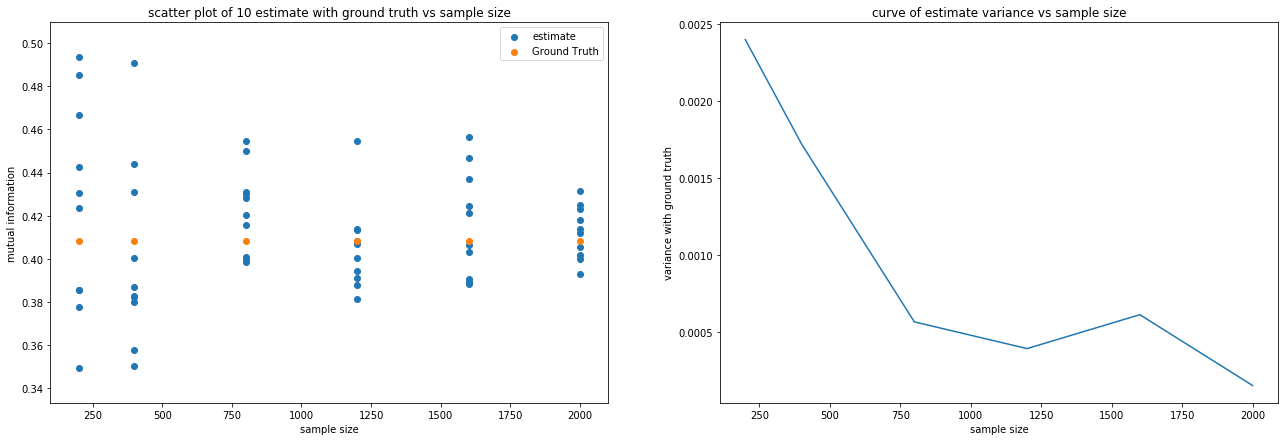

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(22, 7))

axCur = ax[0]
axCur.scatter(sample_sizes, MIs, label="estimate")
axCur.scatter(sample_size, GT, label="Ground Truth")
axCur.legend()
axCur.set_title("scatter plot of {} estimate with ground truth vs sample size".format(num_sample))
axCur.set_xlabel("sample size")
axCur.set_ylabel("mutual information")

axCur = ax[1]
axCur.plot(sample_size, var)
axCur.set_title("curve of estimate variance vs sample size")
axCur.set_xlabel("sample size")
axCur.set_ylabel("variance with ground truth")
plt.show()
plt.close()